In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [3]:
%matplotlib notebook

# 1d case

In [19]:
fs = []
files = sorted(glob.glob('2d/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [20]:
f=fs[0]

In [21]:
f['Primitive'].keys()

<KeysViewHDF5 ['T', 'qx', 'qy', 'qz']>

In [22]:
fs[0]['Primitive/T'].shape

(128, 128)

In [23]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [127]:
print(f"Dissipation strength {fs[0]['Optional'].attrs['kappa'][0]}, relaxation time {fs[0]['Optional'].attrs['tau_q'][0]}, timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.001, relaxation time 0.001, timestep 0.002209708691207961


In [128]:
fs[-1].attrs['t']

array([5.])

In [129]:
x = np.linspace(fs[0]['Domain'].attrs['xmin'], fs[0]['Domain'].attrs['xmax'], fs[0]['Primitive/T'].shape[0])

<IPython.core.display.Javascript object>


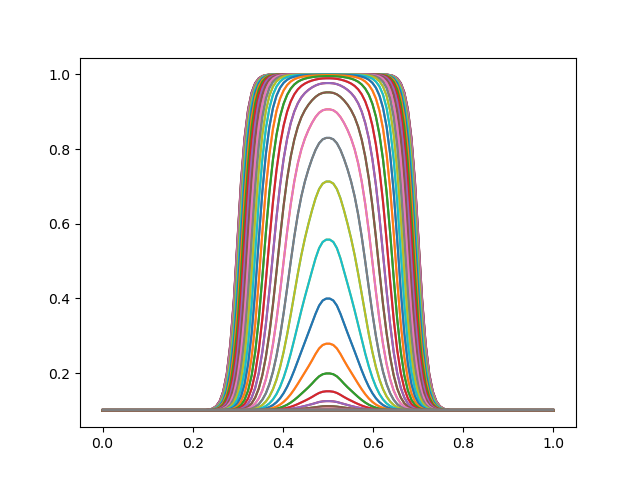

In [130]:
plt.figure()
# for f in fs:
#     plt.plot(x, f['Primitive/T'])
plt.plot(x, fs[1]['Primitive/T'])
plt.show()

<IPython.core.display.Javascript object>


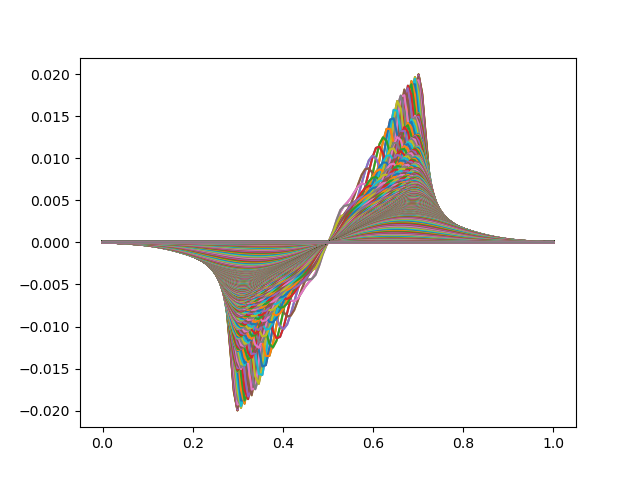

In [131]:
plt.figure()
for f in fs:
    plt.plot(x, f['Primitive/qx'])
plt.show()

<IPython.core.display.Javascript object>


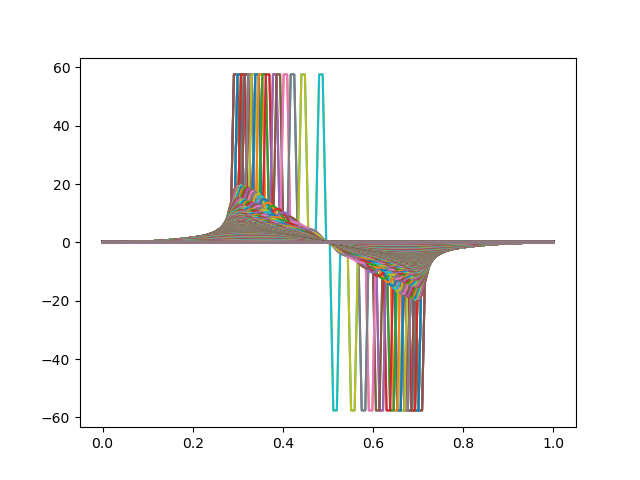

In [132]:
plt.figure()
for f in fs:
    plt.plot(x, f['Auxiliary/dxT'])
plt.show()

In [133]:
Tall = np.zeros((len(fs), fs[0]['Primitive/T'].shape[0]))
for i, f in enumerate(fs):
    #print(f['Primitive/T'].shape[1])
    Tall[i, :] = f['Primitive/T'][1]

<IPython.core.display.Javascript object>


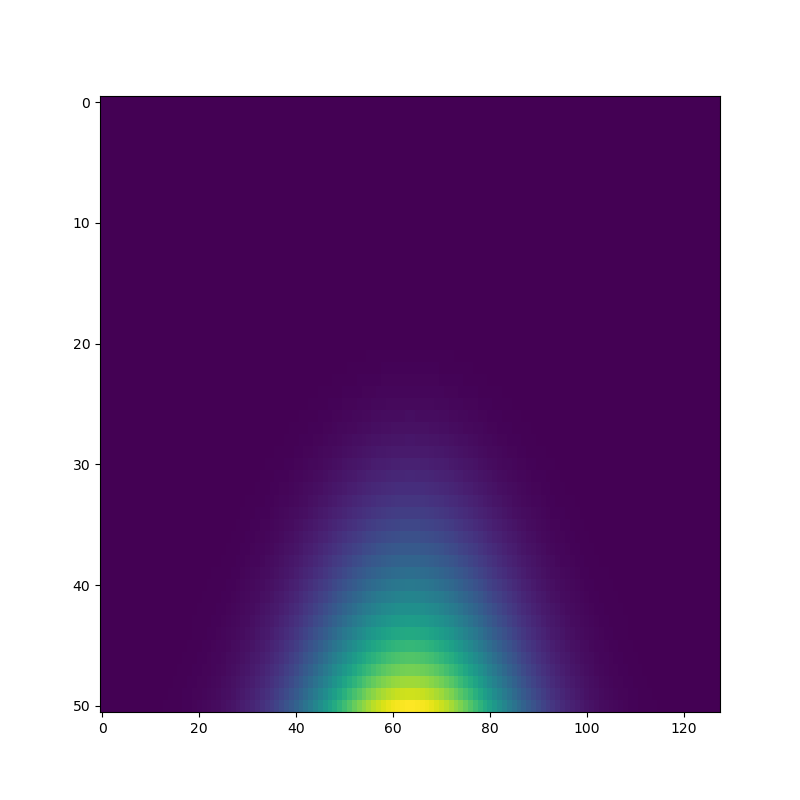

In [134]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

This figure is all about showing that the features propagate at the expected wave speed.

<IPython.core.display.Javascript object>


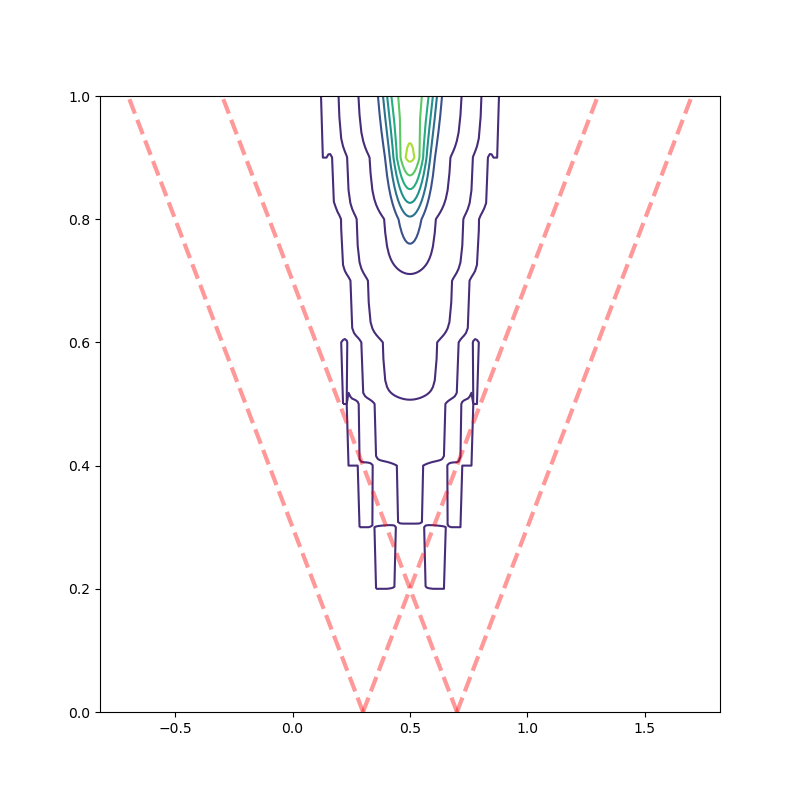

In [140]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[10].attrs['t'], len(fs[:11])).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall[:11,:])
speed = np.sqrt(fs[0]['Optional'].attrs['kappa']/fs[0]['Optional'].attrs['tau_q'])
plt.plot(0.3+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.3-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.show()

# 2d case

In [99]:
fs = []
#files = sorted(glob.glob('2d/data*hdf5'), key=os.path.split("serial")[-1])
#files
for n in range(0,51):
    fs.append(h5py.File(f'2d/data_1em3_serial{n}.hdf5','r'))
#for f in files:
#    fs.append(h5py.File(f, 'r'))
fs

[<HDF5 file "data_1em3_serial0.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial1.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial2.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial3.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial4.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial5.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial6.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial7.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial8.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial9.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial10.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial11.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial12.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial13.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial14.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial15.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial16.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial17.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial18.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial19.hdf5" (mode r)>,
 <HDF5 file "data_1em3_serial2

In [100]:
fs[0]['Domain'].attrs['dy']

array([0.0078125])

In [101]:
fs[0]['Primitive/T'].shape

(128, 128)

In [126]:
#print(f"Dissipation strength {fs[0].attrs[''][0]}, relaxation time {fs[0].attrs['sigma'][0]}, timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 1.6666666666666667, relaxation time 1000.0, timestep 0.002209708691207961


In [103]:
fs[-1].attrs['t']

array([5.])

<IPython.core.display.Javascript object>


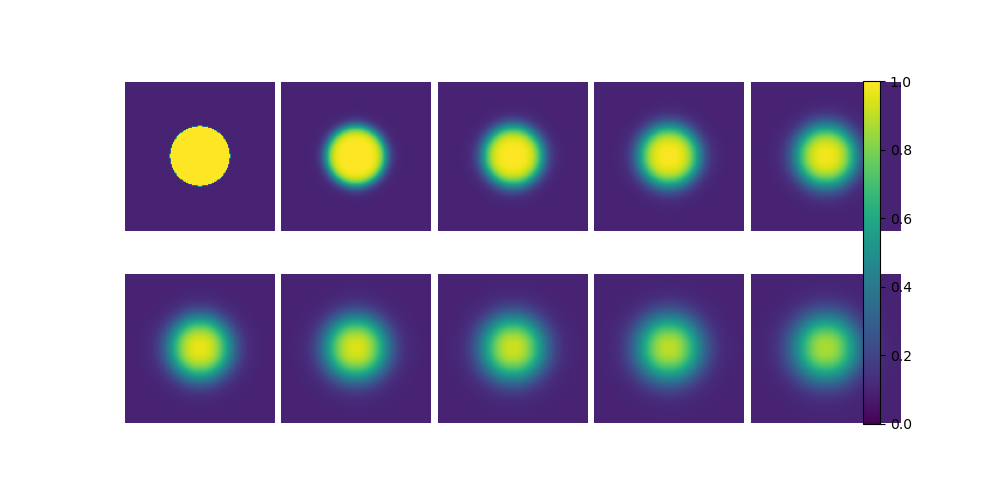

In [124]:
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for f, ax in zip(fs[::5], axes.flatten()):
    mappable = ax.imshow(f['Primitive/T'], vmin=0, vmax=1)
#     ax.set_title(f"Time {f.attrs['t'][0]:.1f}")
    ax.axis('off')
#axes.flatten()[0].set_xlabel('x')
#axes.flatten().append(axes.flatten()[-1])
#axes.add_subplot()
#fig.tight_layout()
fig.colorbar(mappable,ax=axes.flatten(),orientation="vertical",shrink=0.89,anchor=(0.8,0.5))

plt.subplots_adjust(wspace=0.05,hspace=0.001)

plt.savefig('2D_blob.pdf')
plt.show()

<IPython.core.display.Javascript object>


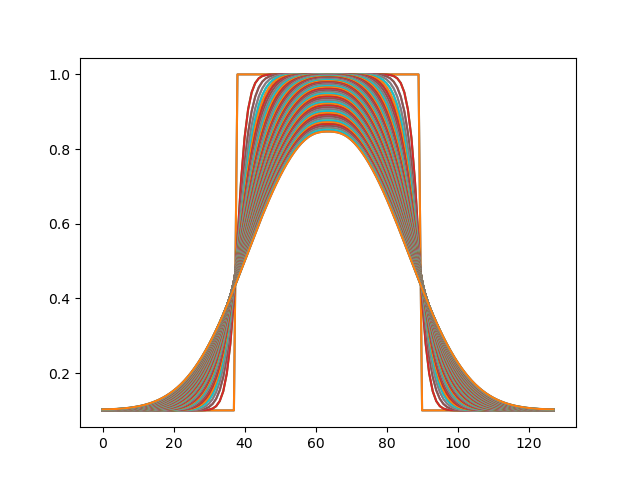

In [105]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)):
    plt.plot(fs[i]['Primitive/T'][:, ny//2])
    plt.plot(fs[i]['Primitive/T'][nx//2, :])
plt.show()